In [15]:
import pandas as pd
import json


# Load JSON data
with open('following.json', 'r') as file:
    json_data = json.load(file)

df1 = pd.DataFrame(json_data)

# Print the resulting dataframe
print(df1)


               follower_uid      influencer_uid         follow_timestamp
0        829451382935531520           902200087  2022-04-26 16:07:33 UTC
1                2872039840  969221141347913734  2022-02-18 15:51:26 UTC
2       1499994241979801600            14709326  2022-04-23 05:40:07 UTC
3       1135376232839864320  836533158669500416  2022-04-28 13:26:38 UTC
4                 431066540            16106584  2017-04-14 11:35:28 UTC
...                     ...                 ...                      ...
551130             78333251           158414847  2013-11-11 01:20:59 UTC
551131           2802988291           158414847  2020-01-11 14:50:13 UTC
551132  1519077442006261761           158414847  2022-04-27 01:35:00 UTC
551133           2861786021           158414847  2019-07-21 14:38:03 UTC
551134  1518751896810496001           158414847  2022-04-26 00:48:35 UTC

[551135 rows x 3 columns]


In [16]:
import pandas as pd
import json


# Load JSON data
with open('engagement.json', 'r') as file:
    json_data = json.load(file)

df2 = pd.DataFrame(json_data)

# Print the resulting dataframe
print(df2)


               follower_uid       influencer_uid      engaged_tweetID  \
0       1000041135396433921  1298372735383605249  1520185102143303684   
1       1000041135396433921            158414847  1520185102143303684   
2       1000041135396433921            288277167  1520185102143303684   
3       1000146462112665601  1022693675250249729  1518276445335961605   
4       1000146462112665601             10774652  1518276445335961605   
...                     ...                  ...                  ...   
155961   999988765664993281               807095  1520185102143303684   
155962   999988765664993281               813286  1520185102143303684   
155963   999988765664993281   825476542478303233  1520185102143303684   
155964   999988765664993281   886398296146706432  1520185102143303684   
155965   999988765664993281            970207298  1520185102143303684   

        engaged_dt  
0       2022-04-29  
1       2022-04-29  
2       2022-04-29  
3       2022-04-24  
4       2022-04-24

Step 1: Network overlap: with the "following.json" dataset, write a function that takes any two influencers' user ID's and calculate the fraction of followers these two influencers share over the total number of followers of the less followed influencer. The reference date is April 30, 2022.


In [22]:
import pandas as pd

def calculate_shared_follower_fraction(data, influencer1_uid, influencer2_uid, reference_date):
    # Filter the dataset based on the reference date
    filtered_data = data[data['follow_timestamp'] < reference_date]

    # Get follower counts for both influencers
    influencer1_followers = filtered_data[filtered_data['influencer_uid'] == influencer1_uid]['follower_uid'].nunique()
    influencer2_followers = filtered_data[filtered_data['influencer_uid'] == influencer2_uid]['follower_uid'].nunique()

    # Determine the less followed influencer
    less_followed_influencer = influencer1_uid if influencer1_followers < influencer2_followers else influencer2_uid

    # Calculate the fraction of shared followers
    shared_followers = filtered_data[(filtered_data['influencer_uid'] == influencer1_uid) &
                                     (filtered_data['follower_uid'].isin(
                                         filtered_data[filtered_data['influencer_uid'] == influencer2_uid]['follower_uid'])
                                     )]['follower_uid'].nunique()

    fraction = shared_followers / influencer1_followers if less_followed_influencer == influencer1_uid \
        else shared_followers / influencer2_followers

    return fraction


In [23]:
calculate_shared_follower_fraction(df1, '902200087', '158414847', '2022-04-30 23:59:59 UTC')

0.007361963190184049

Step 2: Engagement overlap: with the "engagement.json" dataset, write a function that takes any two influencers' user ID's and calculate the fraction of engagers of these two influencers' tweets as a function of the total number of engagers of the less engaged influencer, over the period of April 22, 2022 to April 30, 2022.


In [24]:
import pandas as pd

def calculate_shared_engager_fraction(data, influencer1_uid, influencer2_uid, start_date, end_date):
    # Filter the dataframe based on the date range
    filtered_data = data[(data['engaged_dt'] >= start_date) & (data['engaged_dt'] <= end_date)]

    # Get engager counts for both influencers
    influencer1_engagers = filtered_data[filtered_data['influencer_uid'] == influencer1_uid]['follower_uid'].nunique()
    influencer2_engagers = filtered_data[filtered_data['influencer_uid'] == influencer2_uid]['follower_uid'].nunique()

    # Determine the less engaged influencer
    less_engaged_influencer = influencer1_uid if influencer1_engagers < influencer2_engagers else influencer2_uid

    # Calculate the fraction of shared engagers
    shared_engagers = filtered_data[(filtered_data['influencer_uid'] == influencer1_uid) &
                                    (filtered_data['follower_uid'].isin(
                                        filtered_data[filtered_data['influencer_uid'] == influencer2_uid]['follower_uid'])
                                    )]['follower_uid'].nunique()

    fraction = shared_engagers / influencer1_engagers if less_engaged_influencer == influencer1_uid \
        else shared_engagers / influencer2_engagers

    return fraction


In [25]:
calculate_shared_engager_fraction(df2, '902200087', '969221141347913734', '2022-04-22', '2022-04-30')

0.22559652928416485

Step 3: Produce two histograms of network overlap (Step 2) and engagement overlap (Step 3) measures, respectively, across all influencer pairs

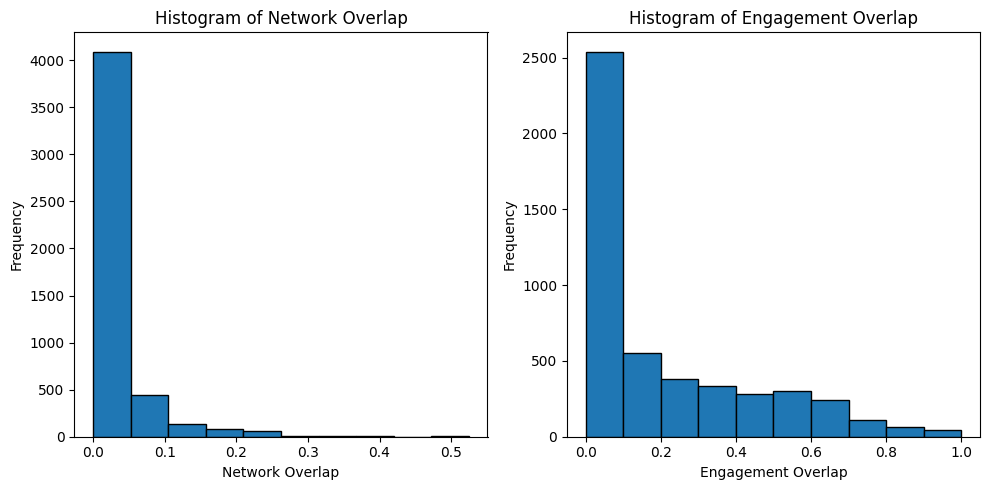

In [28]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Get unique influencer UIDs
unique_influencers = df2['influencer_uid'].unique()

# Lists to store network overlap and engagement overlap measures
network_overlap_measures = []
engagement_overlap_measures = []

# Iterate over unique pairs of influencers
for influencer_pair in itertools.combinations(unique_influencers, 2):
    influencer1_uid, influencer2_uid = influencer_pair
    
    # Calculate network overlap measure
    network_overlap = calculate_shared_follower_fraction(df1,influencer1_uid, influencer2_uid,'2022-04-30 23:59:59 UTC')
    network_overlap_measures.append(network_overlap)
    
    # Calculate engagement overlap measure
    engagement_overlap = calculate_shared_engager_fraction(df2, influencer1_uid, influencer2_uid, '2022-04-22', '2022-04-30')
    if engagement_overlap == 0:  # Handle division by zero
        engagement_overlap_measures.append(0)
    else:
        engagement_overlap_measures.append(engagement_overlap)

# Plot histograms
plt.figure(figsize=(10, 5))

# Histogram of network overlap
plt.subplot(1, 2, 1)
plt.hist(network_overlap_measures, bins=10, edgecolor='black')
plt.xlabel('Network Overlap')
plt.ylabel('Frequency')
plt.title('Histogram of Network Overlap')

# Histogram of engagement overlap
plt.subplot(1, 2, 2)
plt.hist(engagement_overlap_measures, bins=10, edgecolor='black')
plt.xlabel('Engagement Overlap')
plt.ylabel('Frequency')
plt.title('Histogram of Engagement Overlap')

plt.tight_layout()
plt.show()

Step 5: Use OLS to regress engagement overlap on network overlap measures for all influencers pairs, and plot the regression results on a two-dimensional graph with standard error bands.


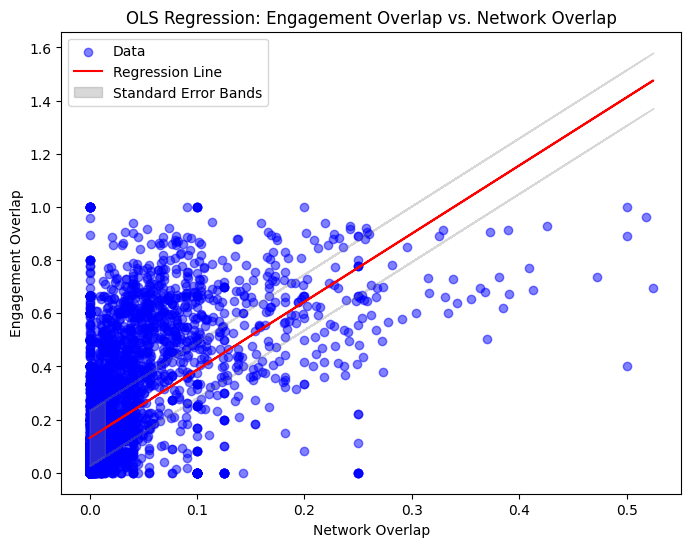

In [29]:
import statsmodels.api as sm
unique_influencers = df2['influencer_uid'].unique()

# Lists to store network overlap and engagement overlap measures
network_overlap_measures = []
engagement_overlap_measures = []

# Iterate over unique pairs of influencers
for influencer_pair in itertools.combinations(unique_influencers, 2):
    influencer1_uid, influencer2_uid = influencer_pair
    
    # Calculate network overlap measure
    network_overlap = calculate_shared_follower_fraction(df1,influencer1_uid, influencer2_uid,'2022-04-30 23:59:59 UTC')
    network_overlap_measures.append(network_overlap)
    
    # Calculate engagement overlap measure
    engagement_overlap = calculate_shared_engager_fraction(df2, influencer1_uid, influencer2_uid, '2022-04-22', '2022-04-30')
    if engagement_overlap == 0:  # Handle division by zero
        engagement_overlap_measures.append(0)
    else:
        engagement_overlap_measures.append(engagement_overlap)

# Create a DataFrame with the network and engagement overlap measures
data = pd.DataFrame({'Network Overlap': network_overlap_measures, 'Engagement Overlap': engagement_overlap_measures})

# Perform OLS regression
X = sm.add_constant(data['Network Overlap'])  # Add a constant term
y = data['Engagement Overlap']
model = sm.OLS(y, X)
results = model.fit()

# Plot regression results with standard error bands
plt.figure(figsize=(8, 6))
plt.scatter(data['Network Overlap'], data['Engagement Overlap'], color='blue', alpha=0.5, label='Data')
plt.plot(data['Network Overlap'], results.fittedvalues, color='red', label='Regression Line')
plt.fill_between(data['Network Overlap'], results.fittedvalues - 1.96 * results.bse[1], results.fittedvalues + 1.96 * results.bse[1], color='gray', alpha=0.3, label='Standard Error Bands')
plt.xlabel('Network Overlap')
plt.ylabel('Engagement Overlap')
plt.title('OLS Regression: Engagement Overlap vs. Network Overlap')
plt.legend()
plt.show()

Step 6: Develop a hypothesis on the determinants of the difference between network vs engagement overlaps, i.e. what makes two influencers have high network overlap but low engagement overlap and vice versa?
 


There are several hypothesis may be considerate in two main aspects:
On one hand, the followers are less willing to interact with one of them.

- Content Relevance. The content of the influencers may be a significant determinant. If two influencers have high network overlap but low engagement overlap, it could indicate that their content is similar and attracts a similar audience. However, the engagement overlap may be low because the content is not highly engaging or resonating with their shared audience. 

- Engagement strategies: The engagement strategies employed by influencers can impact the difference between network overlap and engagement overlap. If an influencer focuses on building a broad network and attracting a large number of followers, they may have a high network overlap. However, if they do not effectively engage their audience or maintain a strong connection with their followers, the engagement overlap may be lower.

- Target Audience Variability: The differences in the target audience characteristics can also play a role. For instance, if two influencers have a high network overlap but low engagement overlap, it might be because their shared audience has diverse interests or preferences. The content or engagement tactics may not align with the specific interests of the shared audience, resulting in lower engagement overlap.


On the other hand, when the influencer actively approach to their followers and enhance the connections:

- Relationship Building: The strength of the relationship between influencers and their followers is a crucial factor. If influencers invest time and effort in building personal connections, fostering a sense of community, and engaging in two-way communication with their followers, it is more likely to result in higher engagement overlap. Conversely, a lack of relationship-building efforts may lead to lower engagement overlap despite having a substantial network overlap.